# Feature extraction
For each of the experiments, already perform the offline augmentation

In [5]:
%load_ext autoreload
%autoreload 2

from util import config, util
import os
import zipfile
from os.path import join
import random
import pandas as pd
import numpy as np
import shutil
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Step 1: Get the raw_feature train and test filenames

In [2]:
raw_feature_train_files_base_path = join(config.RAW_SUBSET_DATA_PATH, 'train/audio')
raw_feature_test_files_base_path = join(config.RAW_SUBSET_DATA_PATH, 'test/audio')

# Create a list of full path filenames of the train and test raw feature files
raw_feature_train_filenames = [join(raw_feature_train_files_base_path, file) for file in os.listdir(raw_feature_train_files_base_path)]
raw_feature_test_filenames = [join(raw_feature_test_files_base_path, file) for file in os.listdir(raw_feature_test_files_base_path)]

## Step 2: Generate the un-augmented train and test features to train the baseline model

In [3]:
# Since we dont want to apply any augmentation, we can just set augment to false
util.generate_and_store_augmented_mel_features(
        raw_feature_train_filenames, 
        config.TRAIN_DATA_BASELINE,
        n_copies=5, 
        augment=[False, False]
    )
util.generate_and_store_augmented_mel_features(
        raw_feature_test_filenames, 
        config.TEST_DATA_BASE_PATH, 
        n_copies=1, 
        augment=[False, False]
    )

  0%|          | 0/10000 [00:00<?, ?it/s]


FileNotFoundError: [Errno 2] No such file or directory: '/home/robbe/code/school/2022-2023/Sem1/applied_ai_academic_perspectives/ASR/project_automated_sound_recognition/data/train/baseline/metro-vienna-59-1752-9-a-0.npy'

## Step 4: Generate the train and test features for the 3 experiments

In [ ]:
# Experiment 1: all augmentation methods

# Set the audiomentations config
audiomentations_config = {
    'augmentations': Compose([
        PitchShift(min_semitones=-4, max_semitones=4, p=0.5),
        AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=0.5),
        TimeStretch(min_rate=0.8, max_rate=1.25, p=0.5),
        Shift(min_fraction=-0.5, max_fraction=0.5, p=0.5),
    ])
}

# Set the spec augment configurations
specaugment_config = {
    'configuration': {
        'mask_fraction_min':0.02,
        'mask_fraction_max':0.02,
        'mask_fraction_min_time':0.04,
        'mask_fraction_max_time':0.04,
        'p_spec_augment':0.5,
        'fill_val':0,
        'num_freq_lines':5,
        'num_time_lines':3,
    }
}

util.generate_and_store_augmented_mel_features(
        files_list = raw_feature_train_filenames, 
        result_export_path = join(config.TRAIN_DATA_EX1, 'all_augment'),
        n_copies = config.N_COPIES, 
        augment = [True, True],
        audiomentations_config = audiomentations_config,
        specaugment_config = specaugment_config
    )

: 

  0%|          | 5/10000 [00:03<1:55:30,  1.44it/s]


KeyboardInterrupt: 

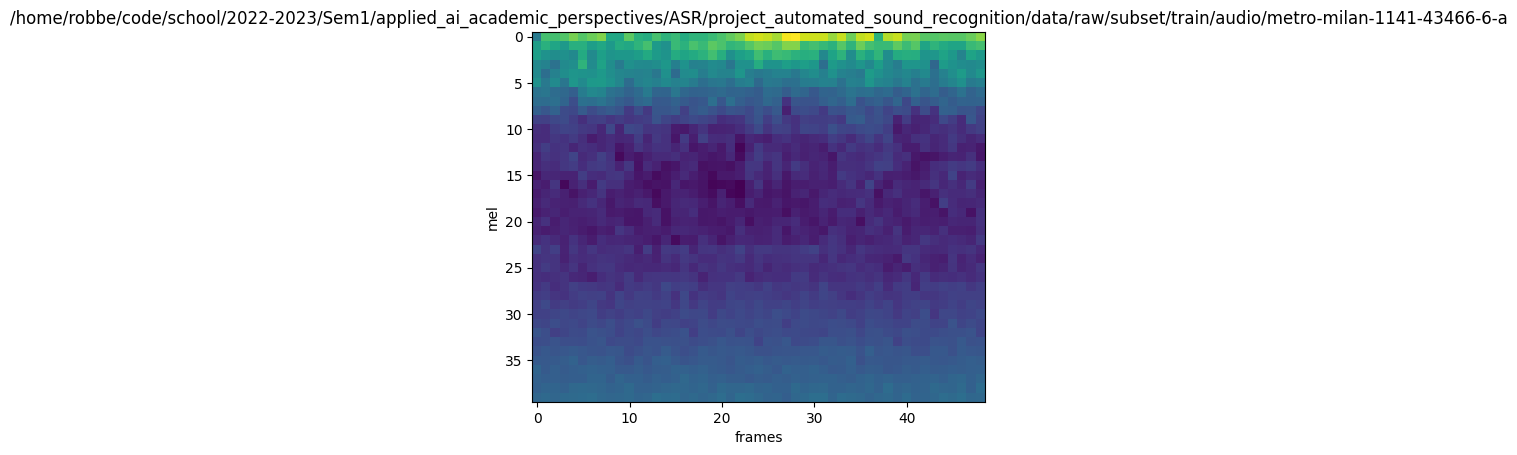

In [10]:
# Experiment 2: all augmentation methods seperately

# Set the audiomentations configs
audiomentation_labels = ['pitch_shift', 'noise']
audiomentations_configs = [
        {
            'augmentations': Compose([
                PitchShift(min_semitones=-4, max_semitones=4, p=0.5),
            ])
        },
        {
            'augmentations': Compose([
                AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=0.5)
            ])
        }
]

# Set the spec augment configuration
specaugment_config = {
    'configuration': {
        'mask_fraction_min':0.02,
        'mask_fraction_max':0.06,
        'mask_fraction_min_time':0.04,
        'mask_fraction_max_time':0.12,
        'p_spec_augment':0.5,
        'fill_val':0,
        'num_freq_lines':5,
        'num_time_lines':3,
    }
}

# First apply the spec augment seperately
util.generate_and_store_augmented_mel_features(
            files_list = raw_feature_train_filenames, 
            result_export_path = join(config.TRAIN_DATA_EX2, 'spec_augment'),
            n_copies = config.N_COPIES, 
            augment = [False, True, False],
            audiomentations_config = None,
            specaugment_config = specaugment_config
        )

# Second try all audiomentations configs seperately
for i in range(len(audiomentations_configs)):
    util.generate_and_store_augmented_mel_features(
            files_list = raw_feature_train_filenames, 
            result_export_path = join(config.TRAIN_DATA_EX2, audiomentation_labels[i]),
            n_copies = config.N_COPIES, 
            augment = [True, False, False],
            audiomentations_config = audiomentations_configs[i],
            specaugment_config = None
        )


